<h1>Importing Libraries</h1>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/advanced-soybean-agricultural-dataset-2025/Advanced Soybean Agricultural Dataset.csv


<h2>Loading Dataset</h2>

In [3]:
data = pd.read_csv("/kaggle/input/advanced-soybean-agricultural-dataset-2025/Advanced Soybean Agricultural Dataset.csv")
display(data.head(n=5))

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
0,C1S1G5,R1,50.5,130.3,111.0,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82
1,C2S3G4,R1,44.5,132.0,80.0,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13
2,C2S1G6,R1,52.2,150.0,83.0,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15
3,C1S1G1,R1,50.5,140.8,66.0,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14
4,C1S2G6,R2,49.2,175.6,73.0,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60


<h1>Exploratory Data Analysis</h1>

In [4]:
# check the size of data
print(data.shape)
# get information regarding the data types of the columns
display(data.info())
# check for missing values
display(data.isnull().sum())
# check statistics of the dataset
display(data.describe())
# check the column names in the dataset
display(data.columns)

(55450, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Parameters                               55450 non-null  object 
 1   Random                                   55450 non-null  object 
 2   Plant Height (PH)                        55450 non-null  float64
 3   Number of Pods (NP)                      55450 non-null  float64
 4   Biological Weight (BW)                   55450 non-null  float64
 5   Sugars (Su)                              55450 non-null  float64
 6   Relative Water Content in Leaves (RWCL)  55450 non-null  float64
 7   ChlorophyllA663                          55450 non-null  float64
 8   Chlorophyllb649                          55450 non-null  float64
 9   Protein Percentage (PPE)                 55450 non-null  float64
 10  Weight of 300 Seeds (W3S)         

None

Parameters                                 0
Random                                     0
Plant Height (PH)                          0
Number of Pods (NP)                        0
Biological Weight (BW)                     0
Sugars (Su)                                0
Relative Water Content in Leaves (RWCL)    0
ChlorophyllA663                            0
Chlorophyllb649                            0
Protein Percentage (PPE)                   0
Weight of 300 Seeds (W3S)                  0
Leaf Area Index (LAI)                      0
Seed Yield per Unit Area (SYUA)            0
Number of Seeds per Pod (NSP)              0
Protein Content (PCO)                      0
dtype: int64

,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
count,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000
mean,49.959392,144.938979,114.533886,0.477543,0.673621,3.937670,2.399096,36.042123,35.349129,0.072132,4388.525773,2.020076,0.507610
std,3.052315,20.015994,48.925533,0.236294,0.084515,2.846317,1.187323,2.417205,4.999200,0.022278,1251.490529,0.245889,0.287548
min,40.400000,75.000000,32.000000,0.161000,0.434000,1.000000,1.100000,31.100000,26.400000,0.020000,2127.500000,1.400000,0.120000
25%,49.200000,131.400000,80.000000,0.295000,0.632250,1.500000,1.300000,33.600000,32.200000,0.060000,3352.200000,1.850000,0.330000
50%,50.300000,147.000000,102.000000,0.466000,0.677000,2.300000,2.200000,36.600000,34.500000,0.080000,4300.700000,2.050000,0.480000
75%,52.000000,158.000000,133.000000,0.612000,0.722000,6.700000,3.100000,38.000000,37.200000,0.090000,5233.500000,2.200000,0.600000
max,55.700000,218.000000,236.000000,1.115000,0.875000,10.200000,7.800000,39.900000,53.900000,0.100000,7841.500000,2.600000,1.800000


Index(['Parameters', 'Random ', 'Plant Height (PH)', 'Number of Pods (NP)',
       'Biological Weight (BW)', 'Sugars (Su)',
       'Relative Water Content in Leaves (RWCL)', 'ChlorophyllA663',
       'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Seed Yield per Unit Area (SYUA)', 'Number of Seeds per Pod (NSP)',
       'Protein Content (PCO)'],
      dtype='object')

<h1>Data Visualizations</h1>

<h2>Histograms of Different Numerical Values</h2>

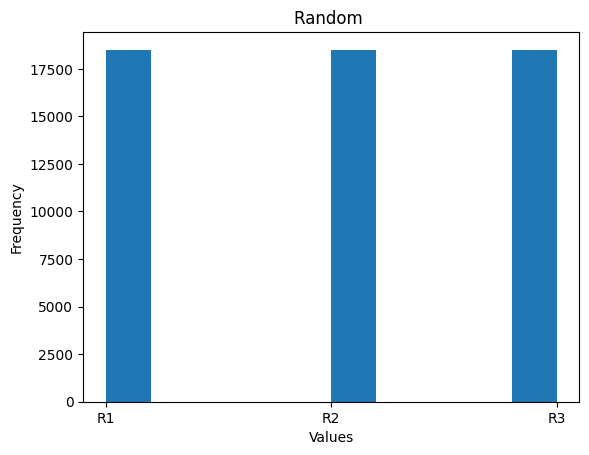

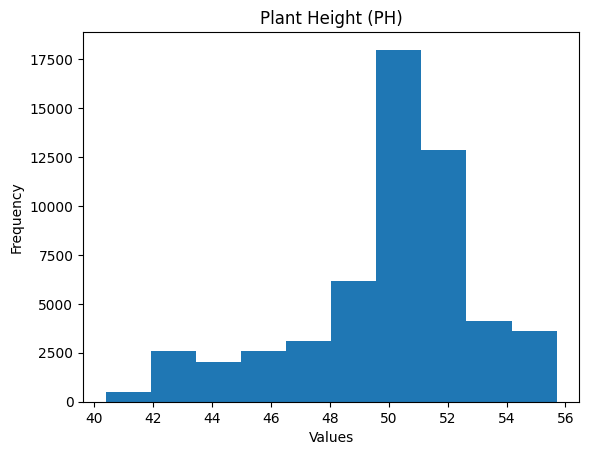

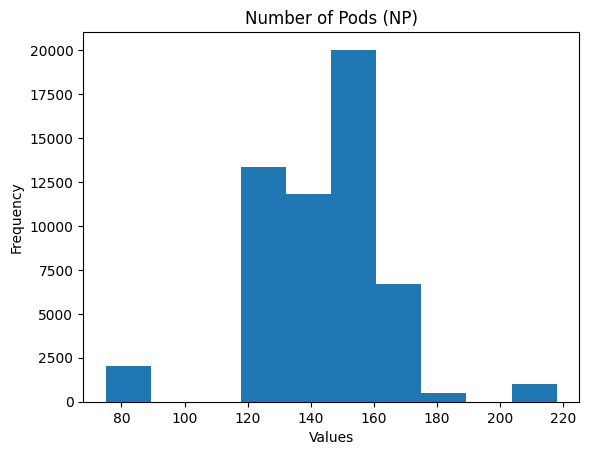

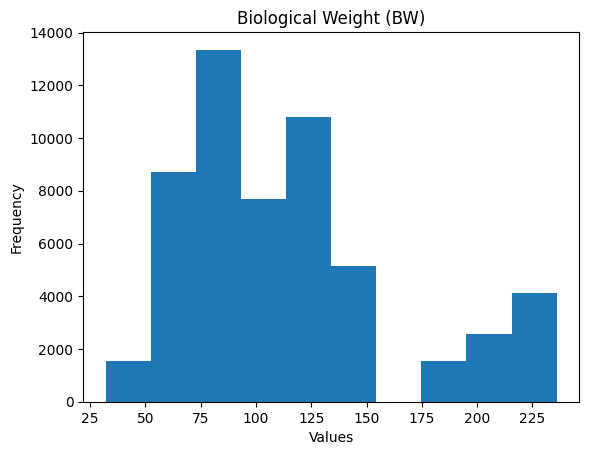

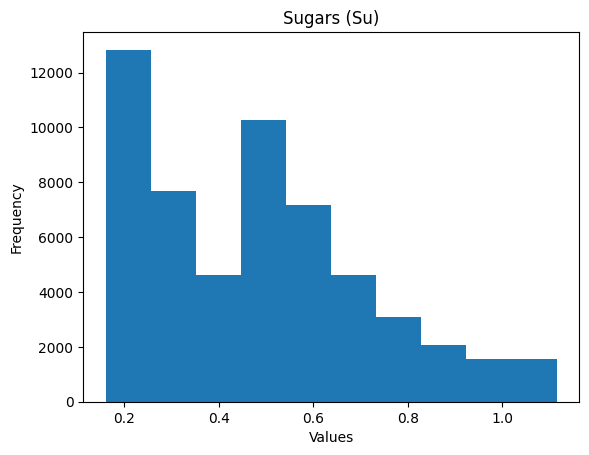

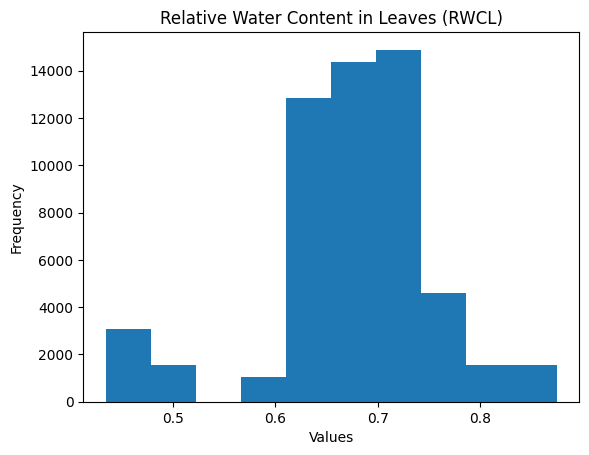

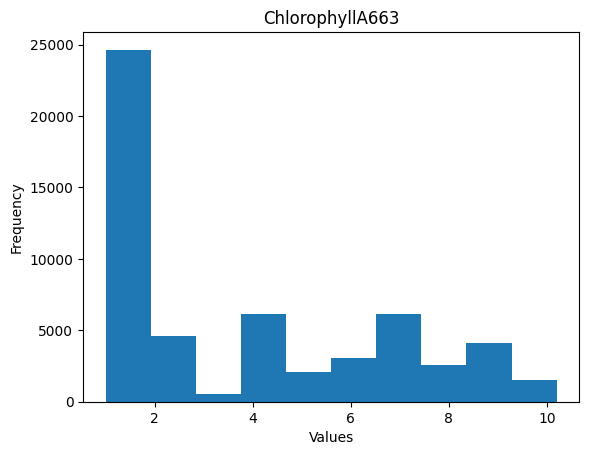

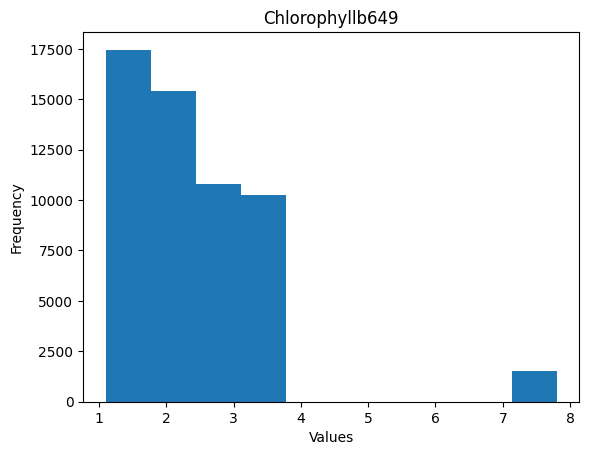

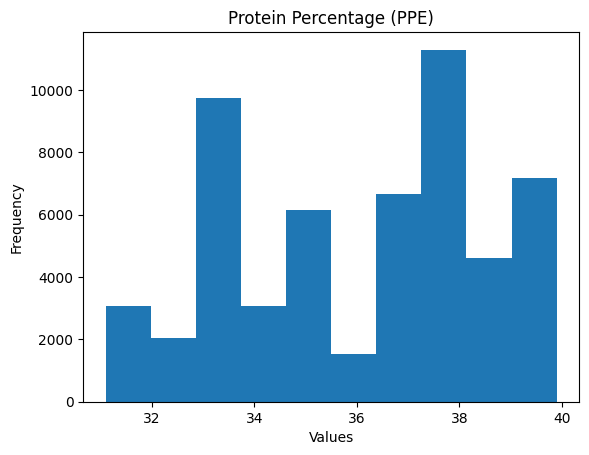

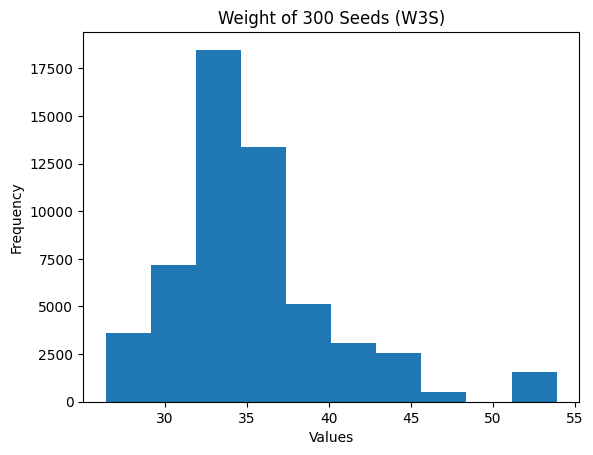

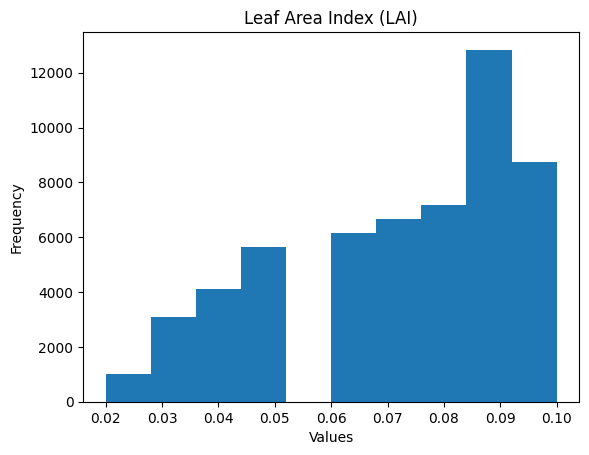

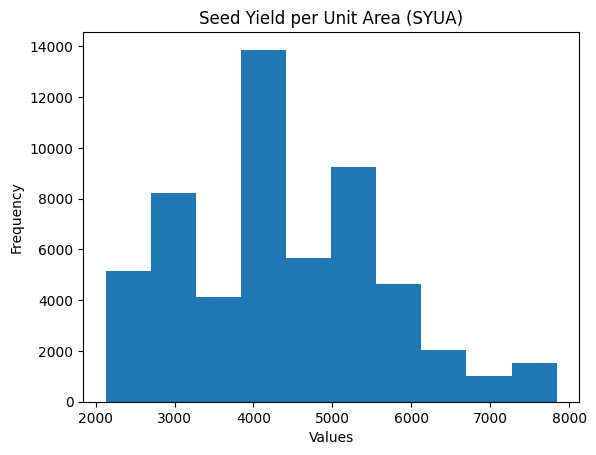

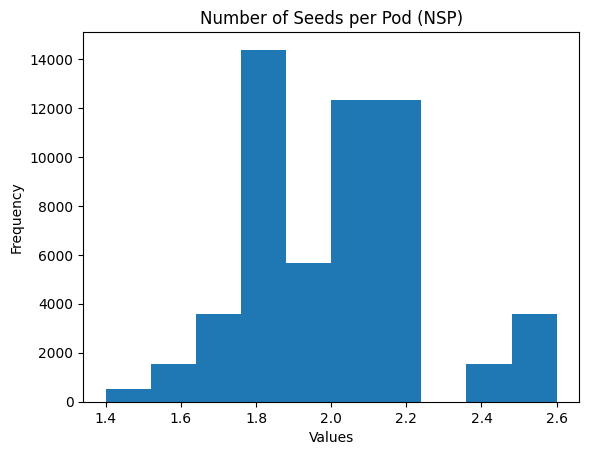

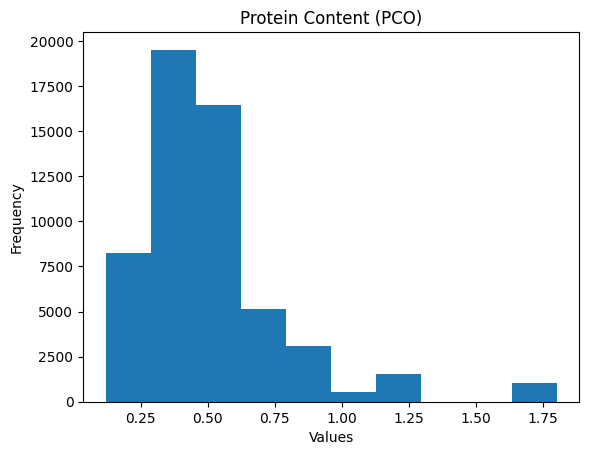

In [5]:
for i in data.columns[1:]:
    plt.hist(data[i])
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title(i)
    plt.show()

In [6]:
data.columns

Index(['Parameters', 'Random ', 'Plant Height (PH)', 'Number of Pods (NP)',
       'Biological Weight (BW)', 'Sugars (Su)',
       'Relative Water Content in Leaves (RWCL)', 'ChlorophyllA663',
       'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Seed Yield per Unit Area (SYUA)', 'Number of Seeds per Pod (NSP)',
       'Protein Content (PCO)'],
      dtype='object')

<h2>Scatter Plots</h2>

In [ ]:
x1 = data['Plant Height (PH)']
y1 = data ['Seed Yield per Unit Area (SYUA)']
x2 = data ['Number of Pods (NP)']
plt.scatter(x1, y1, color = "red")
plt.title("Plant Height VS Seed Yield per Unit Area")
plt.show()

In [ ]:
plt.scatter(x2,y1, color="brown")
plt.title("Number of Pods VS Seed Yield per Unit Area")
plt.show()

<h2>Find the Correlation</h2>

In [ ]:
df = data.drop(columns=['Parameters','Random '])

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Features Correlation Map")
plt.show()

<h1>Feature Importance Analysis Using Random Forest</h1>

* Feature importance analysis helps us identify which factors most significantly influence Seed Yield per Unit Area (SYUA). By understanding these key features, we can:
  * ✅ Improve model interpretability.
  * ✅ Reduce dimensionality by removing less important features.
  * ✅ Enhance model performance by focusing on high-impact variables.
  * ✅ Gain domain-specific insights for optimizing agricultural yield.

<h3>To determine feature importance, we use a Random Forest Regressor, which is an ensemble learning method that aggregates multiple decision trees. It assigns importance scores based on how much each feature contributes to reducing prediction error.</h3>
 * A higher score means the feature has a greater impact on predicting SYUA.

In [ ]:
X = df.drop(columns=['Seed Yield per Unit Area (SYUA)'])  # Features
y = df['Seed Yield per Unit Area (SYUA)']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>Model Traning</h2>

In [ ]:
# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

<h2>Evaluating the Model</h2>

In [ ]:
# get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Predicting Seed Yield (SYUA)")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

<h3>This analysis helps us understand which traits (e.g., plant height, biological weight) are crucial for maximizing crop yield, allowing for better decision-making in agriculture and precision farming.</h3>

<h1>Linear Regression for Predicting the Seed Yield per Unit Area</h1>

<H3>Now that we have identified the important features, we can use Linear Regression to predict the Seed Yield per Unit Area</H3>

In [ ]:
# Select only important features 
important_features = ['Plant Height (PH)', 'Number of Pods (NP)','Relative Water Content in Leaves (RWCL)','ChlorophyllA663', 
                      'Biological Weight (BW)','Weight of 300 Seeds (W3S)', 'Sugars (Su)', 'Number of Seeds per Pod (NSP)']  

X = data[important_features]  # Feature matrix with selected important features
y = data['Seed Yield per Unit Area (SYUA)']  # Target variable

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>Model Training</h2>

In [ ]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

<h2>Evaluate the Model</h2>

In [ ]:
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs Predicted Values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Perfect Fit")
plt.xlabel("Actual SYUA")
plt.ylabel("Predicted SYUA")
plt.title("Linear Regression - Actual vs Predicted Yield")
plt.legend()
plt.show()